#Predicting the car price based on specific features

Analysing the features contributing to car price by applying Regression Model

In [2]:
#importing pandas to read the file uploaded in the form of dataframe
import pandas as pd

dataset = pd.read_csv('/content/automobileEDA.csv')

dataset.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
#finding sum of missing value
dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [3]:
#finding the basic information of the dataset (datatype, missing value, total columns & rows)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [ ]:
#displaying all features in the dataset
pd.set_option('display.max_columns', None)

dataset.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
#replacing the missing value in Stroke column with its mean value
import numpy as np

dataset['stroke'].replace(np.nan, dataset['stroke'].mean(), inplace = True)

dataset.dropna(subset = ['horsepower-binned'], axis = 0, inplace = True)
dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

In [ ]:
#finding the correlation among the numeric features in the dataset
dataset_numeric = dataset.select_dtypes(include = ['number'])

dataset_numeric.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466791,-0.535188,-0.362874,-0.238166,-0.567535,-0.228506,-0.100529,-0.137757,-0.013384,-0.181328,0.094595,0.279269,-0.042343,0.029808,-0.074370,0.079136,-0.198130,0.198130
normalized-losses,0.466791,1.000000,-0.056701,0.019523,0.087919,-0.379444,0.101270,0.119466,-0.029908,0.055473,-0.114745,0.227857,0.239580,-0.227076,-0.183749,0.136857,0.244989,-0.101574,0.101574
wheel-base,-0.535188,-0.056701,1.000000,0.877324,0.819540,0.606754,0.790045,0.595101,0.492272,0.163266,0.249673,0.377636,-0.359959,-0.470169,-0.543893,0.589754,0.480564,0.308418,-0.308418
length,-0.362874,0.019523,0.877324,1.000000,0.856350,0.519878,0.882080,0.695517,0.607411,0.136674,0.158201,0.579175,-0.285708,-0.660987,-0.694374,0.687952,0.654880,0.214703,-0.214703
width,-0.238166,0.087919,0.819540,0.856350,1.000000,0.342910,0.862486,0.727408,0.543823,0.210494,0.188558,0.602482,-0.246193,-0.625728,-0.673340,0.743744,0.662792,0.251353,-0.251353
height,-0.567535,-0.379444,0.606754,0.519878,0.342910,1.000000,0.352288,0.144002,0.193210,-0.081812,0.267926,-0.037302,-0.317816,-0.074819,-0.132738,0.176917,0.044950,0.281833,-0.281833
curb-weight,-0.228506,0.101270,0.790045,0.882080,0.862486,0.352288,1.000000,0.849399,0.646366,0.193454,0.154810,0.748309,-0.281251,-0.744201,-0.790145,0.827789,0.776163,0.229833,-0.229833
engine-size,-0.100529,0.119466,0.595101,0.695517,0.727408,0.144002,0.849399,1.000000,0.589734,0.260706,0.022182,0.803239,-0.266709,-0.649026,-0.678031,0.872281,0.729127,0.083769,-0.083769
bore,-0.137757,-0.029908,0.492272,0.607411,0.543823,0.193210,0.646366,0.589734,1.000000,-0.049606,-0.000045,0.577905,-0.266876,-0.580740,-0.590338,0.544083,0.557465,0.055860,-0.055860
stroke,-0.013384,0.055473,0.163266,0.136674,0.210494,-0.081812,0.193454,0.260706,-0.049606,1.000000,0.191736,0.139086,-0.065752,-0.049819,-0.051449,0.107837,0.063691,0.239974,-0.239974


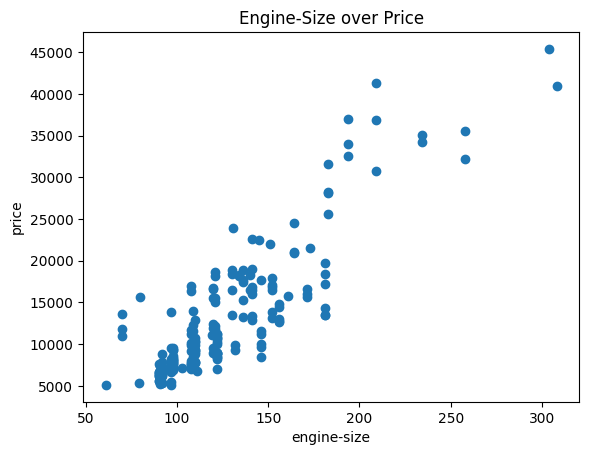

In [ ]:
#visualising the relationship between engine-size and price through scatter plot
from matplotlib import pyplot as plt
import seaborn as sns

plt.scatter(x = 'engine-size', y = 'price', data = dataset)
plt.xlabel('engine-size')
plt.ylabel('price')
plt.title('Engine-Size over Price')

plt.show()

(0.0, 50764.964783846684)

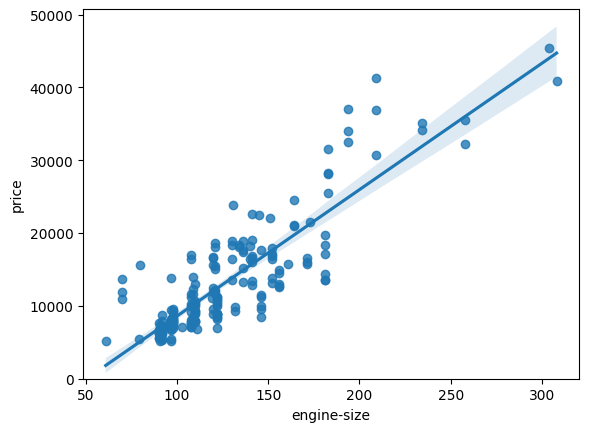

In [ ]:
#correlation between engine-size and price
sns.regplot(x = 'engine-size', y = 'price', data=dataset)

plt.ylim(0,)

(0.0, 47917.97707210245)

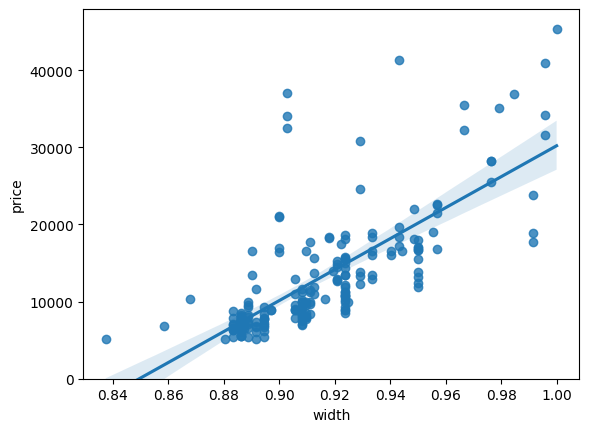

In [ ]:
#correlation between width and price
sns.regplot(x = 'width', y = 'price', data=dataset)

plt.ylim(0,)

(0.0, 47414.1)

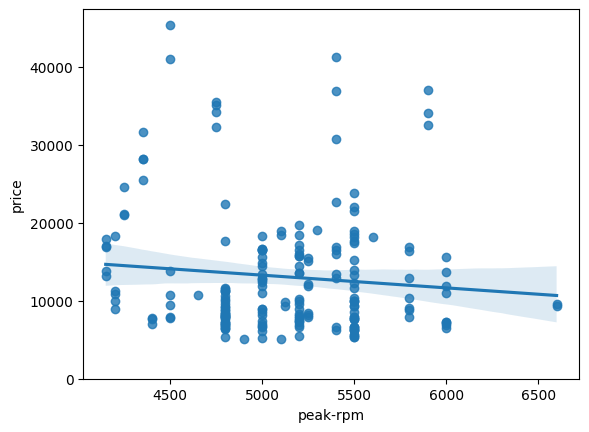

In [ ]:
#correlation between peak-rpm and price
#weak correlation
sns.regplot(x = 'peak-rpm', y = 'price', data = dataset)

plt.ylim(0,)

In [ ]:
#Modeling engine-size with prize

#split data for train & test

import numpy as np

msk = np.random.rand(len(dataset)) <= 0.9

train = dataset[msk]
test = dataset[~msk]

#calling regression model and changing dataframe to array for training
from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['engine-size']])
train_y = np.asanyarray(train[['price']])

regr.fit (train_x, train_y)

#prediction

test_x = np.asanyarray(test[['engine-size']])
test_y = np.asanyarray(test[['price']])

test_y1 = regr.predict(test_x)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 score is:', round(((r2_score(test_y, test_y1))*100),2))
print('The MSE is:', round(((np.mean((test_y - test_y1)**2,)))*100,2))
print('The MAE is:', round(((np.mean(np.absolute(test_y - test_y1))))*100, 2))
print('The RSME is:', np.sqrt(mean_squared_error(test_y, test_y1)))

#if the value of MSE & MAE is high, meand have more outliers
#removing the outliers can improve the evaluation


The R2 score is: 85.94
The MSE is: 1078143006.47
The MAE is: 212104.79
The RSME is: 3283.508803808712


In [ ]:
#Modeling curb-weight with prize

#split data for train & test

import numpy as np

msk = np.random.rand(len(dataset)) <= 0.9

train = dataset[msk]
test = dataset[~msk]

#calling regression model and changing dataframe to array for training
from sklearn import linear_model

regr1 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['curb-weight']])
train_y = np.asanyarray(train[['price']])

regr1.fit (train_x, train_y)

#prediction

test_x = np.asanyarray(test[['curb-weight']])
test_y = np.asanyarray(test[['price']])

test_y1 = regr1.predict(test_x)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 score is:', round(((r2_score(test_y, test_y1))*100),2))
print('The MSE is:', round(((np.mean((test_y - test_y1)**2,)))*100,2))
print('The MAE is:', round(((np.mean(np.absolute(test_y - test_y1))))*100, 2))
print('The RSME is:', np.sqrt(mean_squared_error(test_y, test_y1)))

The R2 score is: 67.17
The MSE is: 1338794092.96
The MAE is: 297582.48
The RSME is: 3658.9535292993196


In [ ]:
#Modeling engine-size, curb-weight, width, horsepower, city-L/100km with prize

#split data for train & test

import numpy as np

msk = np.random.rand(len(dataset)) <= 0.9

train = dataset[msk]
test = dataset[~msk]

#calling regression model and changing dataframe to array for training
from sklearn import linear_model

regr2 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['engine-size', 'curb-weight', 'width', 'horsepower', 'city-L/100km']])
train_y = np.asanyarray(train[['price']])

regr2.fit (train_x, train_y)

#prediction

test_x = np.asanyarray(test[['engine-size', 'curb-weight', 'width', 'horsepower', 'city-L/100km']])
test_y = np.asanyarray(test[['price']])

test_y1 = regr2.predict(test_x)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 score is:', round(((r2_score(test_y, test_y1))*100),2))
print('The MSE is:', round(((np.mean((test_y - test_y1)**2,)))*100,2))
print('The MAE is:', round(((np.mean(np.absolute(test_y - test_y1))))*100, 2))
print('The RSME is:', np.sqrt(mean_squared_error(test_y, test_y1)))

The R2 score is: 77.63
The MSE is: 1409082994.43
The MAE is: 228095.28
The RSME is: 3753.775425392014


In [ ]:
#Modeling engine-size, curb-weight, horsepower with prize

#split data for train & test

import numpy as np

msk = np.random.rand(len(dataset)) <= 0.9

train = dataset[msk]
test = dataset[~msk]

#calling regression model and changing dataframe to array for training
from sklearn import linear_model

regr3 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['engine-size', 'curb-weight', 'horsepower', 'city-L/100km']])
train_y = np.asanyarray(train[['price']])

regr3.fit (train_x, train_y)

#prediction

test_x = np.asanyarray(test[['engine-size', 'curb-weight', 'horsepower', 'city-L/100km']])
test_y = np.asanyarray(test[['price']])

test_y1 = regr3.predict(test_x)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 score is:', round(((r2_score(test_y, test_y1))*100),2))
print('The MSE is:', round(((np.mean((test_y - test_y1)**2,)))*100,2))
print('The MAE is:', round(((np.mean(np.absolute(test_y - test_y1))))*100, 2))
print('The RSME is:', np.sqrt(mean_squared_error(test_y, test_y1)))

The R2 score is: 61.88
The MSE is: 656293220.33
The MAE is: 196380.93
The RSME is: 2561.8220475523653
